# F1 data anaysis using pandas

## Prologue
In this notebook, an analysis of the F1 data is performed using the pandas library. The data is loaded [f1-telem-web-app](https://github.com/AumPauskar/f1-telem-webapp). Docker image may be downloaded from [here](https://hub.docker.com/repository/docker/aumpauskar/f1-flaskapp/general) provided you are running on a linux (debian) based machine. 

## About the data

This data is collected from the 2024 Monaco Grand Prix the historial race which is being run since 1929. In Monaco/Monte Carlo a race victory is historically ensured by **qualifying results** rather than the race.

**What is qualifying?**\
Qualifying is a session that determines the starting order of cars in the race. The person who sets the fastest lap time starts at the front of the grid. The person who sets the slowest lap time starts at the back of the grid. Since Monaco is a street circuit, it is very difficult to overtake. Hence, the starting position is very important. 

**Format of qualifying**\
The qualifying session is divided into three parts. The first part is called Q1, the second part is called Q2, and the third part is called Q3. The slowest 5 cars are eliminated in Q1, from the remaining cars, the slowest 5 cars are eliminated in Q2. The remaining 10 cars compete in Q3 to determine the starting order of the top 10 cars. Laptimes may not be comparable between Q1, Q2, and Q3 because the track gets faster as the rubber is laid down on the track, slight changes in weather, track temperature, wind speed, etc. These factors may not be huge but they are enough between "pole position" and elimination in Q1.

## Cleaning the data

In qualifying drivers do "fast laps" and "slow laps". Fast laps are the one which we are actually interested in and slow laps are the ones where the driver is either warming up the tires, cooling down the engine, charging the battery, etc. We need to filter out the slow laps. By using the **multiviewer for f1** app we can check which telemetry data is the fast lap and which is the slow lap.

In Q1 the fastest driver was **George Russell** and the slowest driver was **Zhou Guanyu**. 

**George Russell** set his fastest lap in Q1 at the time marker of **00:18:30** (- 00:19:42) a time of **1:11.492**. And **Zhou Guanyu** started at the **00:20:00** (- 00:21:13) time marker with a time of **1:13.247**. George Russell got P1 and Zhou Guanyu got P20 in the first part of qualifying.

Here is an example of **George Russell's** cleaned data

In [17]:
import pandas as pd

# Read the CSV data
rus_q1_data = pd.read_csv("data/cleaned/rus_q1.csv")

# Display the data
rus_q1_data.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,05:48.9,0 days 00:18:44.169000,NaN,1.625909,0 days 00:05:39.402000,10648.0,227.0,5.0,100.0,False,12.0,car,12911.96222,0.141443,OnTrack,-7379.143721,-8216.632321,503.175498
1,05:49.1,0 days 00:18:44.450000,NaN,1.625203,0 days 00:05:39.683000,11108.0,234.0,6.0,100.0,False,12.0,car,12930.22722,0.141643,OnTrack,-7415.377831,-8085.755405,502.234836
2,05:49.2,0 days 00:18:44.545000,NaN,1.624849,0 days 00:05:39.778000,11152.0,235.0,6.0,100.0,False,12.0,pos,12936.45321,0.141711,OnTrack,-7427.000000,-8043.000000,502.000000
3,05:49.3,0 days 00:18:44.610000,NaN,1.624496,0 days 00:05:39.843000,11197.0,237.0,6.0,100.0,False,12.0,car,12940.76056,0.141759,OnTrack,-7435.420288,-8012.359323,501.908022
4,05:49.6,0 days 00:18:44.930000,NaN,1.623789,0 days 00:05:40.163000,11560.0,247.0,6.0,100.0,False,12.0,car,12962.71611,0.141999,OnTrack,-7484.286428,-7834.393120,501.998063


Here is an example of **Zhou Guyanyu's** cleaned data

In [18]:
# Read the CSV data
zho_q1_data = pd.read_csv("data/cleaned/zho_q1.csv")

# Display the data
zho_q1_data.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,14:58.3,0 days 00:27:53.651000,55,2011.189722,0 days 00:13:04.430000,10859,263,7,100,False,12,car,22885.54306,0.640504,OnTrack,-7623,-7148,503
1,14:58.5,0 days 00:27:53.811000,55,2009.234167,0 days 00:13:04.590000,10567,266,7,100,False,12,car,22897.36528,0.640835,OnTrack,-7630,-7065,503
2,14:58.5,0 days 00:27:53.865000,55,2006.800833,0 days 00:13:04.644000,10672,267,7,100,False,12,pos,22901.37549,0.640947,OnTrack,-7634,-7022,503
3,14:58.7,0 days 00:27:54.051000,55,2004.367500,0 days 00:13:04.830000,10777,269,7,100,False,12,car,22915.29861,0.641337,OnTrack,-7648,-6823,502
4,14:58.8,0 days 00:27:54.125000,55,2000.750833,0 days 00:13:04.904000,10898,272,7,100,False,12,pos,22920.91213,0.641494,OnTrack,-7654,-6753,502


From this we can analyze the mean, median, mode, and standard deviation of the lap times of the drivers in Q1.

**Mean speed of george russell**\


In [19]:
mean_speed_q1_rus = rus_q1_data["Speed"].mean()
mean_speed_q1_rus

170.4111570247934

similarly we can do this for zhou

In [20]:
mean_speed_q1_zho = zho_q1_data["Speed"].mean()
mean_speed_q1_zho

161.62769784172662

similarly we can find the median speeds of the two drivers

George Russell

In [21]:
median_speed_q1_rus = rus_q1_data["Speed"].median()
median_speed_q1_rus

172.0

Zhou Guanyu

In [22]:
median_speed_q1_zho = zho_q1_data["Speed"].median()
median_speed_q1_zho

158.5

An essential analysis of data in Formula 1 is to find the major loss of speed through the corners. On a low speed track like monaco it is essential to keep the minimum speed as high as possible.

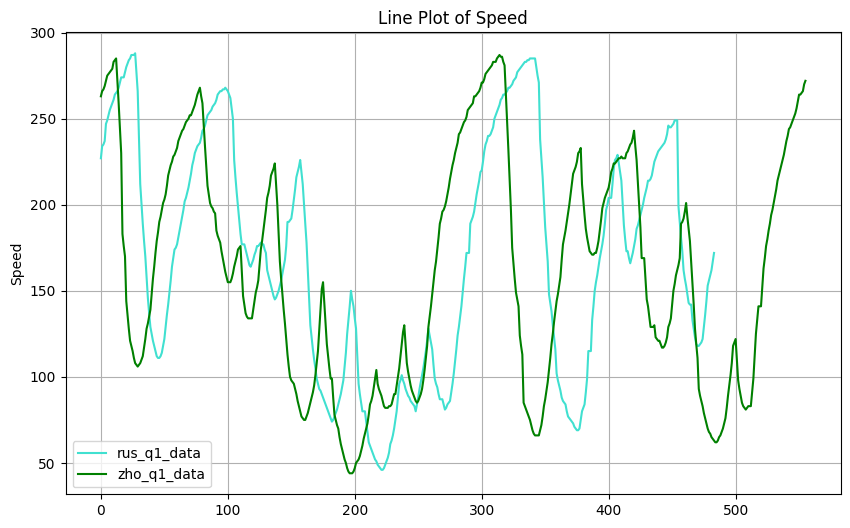

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot 'rus_q1_data' Speed in turquoise
plt.plot(rus_q1_data['Speed'], color='turquoise', label='rus_q1_data')

# Plot 'zho_q1_data' Speed in green
plt.plot(zho_q1_data['Speed'], color='green', label='zho_q1_data')

plt.title('Line Plot of Speed')
plt.xlabel('')
plt.ylabel('Speed')
plt.grid(True)

# Add a legend
plt.legend()

plt.show()

As we can see from the graph the speed of George Russell is higher than Zhou Guanyu in all the corners. Mainly on Sainte Devote, Casino, Mirabeau, Portier, and Piscine corners. This is the due to a upgraded spec wing and a better car package.